![img](https://drive.google.com/uc?export=view&id=1kgX98Ziw9LzgBCT2BxChttfrTcBltLej)


# MÓDULO 3. Unidad 2 - Clase 1

---

> Perceptrón simple: tipos de problemas que resuelve.

> Funcionamiento de un Perceptrón simple. Ejemplo de **clasificación** de dos dígitos. Frontera de Decisión.

> Problemas que NO puede resolver un Perceptrón simple.

Este curso tiene como **objetivo principal** introducir los últimos avances en Inteligencia Artificial, a través del estudio de las llamadas **redes neuronales** y sus aplicaciones actuales para resolver problemas concretos de la vida real.

# Perceptrón Simple

El Perceptrón simple fue introducido en 1958 por Frank Rosenblantt. **Se trata del modelo más sencillo de redes neuronales artificiales**, ya que consta de una sola capa de neuronas con una única salida $y$.

El Perceptrón es la forma más simple de una red neuronal usada para la clasificación de un tipo especial de patrones, los linealmente separables (es decir, patrones que se encuentran a ambos lados de un hiperplano). Esto quiere decir que **los problemas que el Perceptrón es capaz de resolver son los linealmente separables**. ¿Qué quiere decir esto?


![img](https://drive.google.com/uc?export=view&id=1ODNnkUNl-AaiittBdYJeBvgBjD5emzk4)

# Funcionamiento de un Perceptrón Simple

Veamos un ejemplo que nos permita jugar un poco con este algoritmo, utilizando un dataset de clasificación de dígitos escritos manualmente.

## Importaciones

In [1]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(2021)

## Definiciones

In [2]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean) #OrRd_r)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Greys)

## Carga del Dataset

In [3]:
# Let's start by loading the dataset
n = 10
X, y = load_digits(n_class=n, return_X_y=True)

In [4]:
# We select two classes (digits 4 and 9)
mask = ((y==4) | (y==9))
X = X[mask]
y = y[mask]

In [5]:
X.shape

(361, 64)

In [6]:
y.shape

(361,)

In [7]:
class_list = list(set(y))
class_list

[9, 4]

## Exploración del Dataset

### Estructura de los Datos

Los datos consisten en el valor para 64 pixeles de cada imagen de 8x8, en donde cada uno de los pixeles puede tomar un valor de 1 a 16.

Para entender las columnas de nuestro dataset, imaginemos un tablero de ajedrez, en donde cada casilla representará un pixel (cada una de las columnas de nuestro dataset). Los pixeles se ubicarán de la siguiente forma:

![img](https://drive.google.com/uc?export=view&id=15Ek9tbjgPiInX8xo-6fJgrkgZgNTciqn)

### Imágenes de los Dígitos

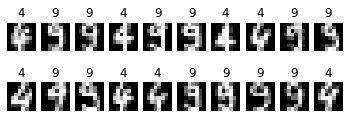

In [8]:
## Construimos el gráfico
figure = plt.figure(figsize=(6, 2))
cols, rows = 10, 2
for i in range(1, cols*rows + 1):
    ## Elegimos muestras al azar para visualizar
    idx = np.random.randint(len(X))
    img, label = X[idx].reshape(8, 8), y[idx]
    figure.add_subplot(rows, cols, i)
    plt.title(f'{label}') #{label}
    plt.axis("off")
    plt.imshow(img, cmap="gray")
plt.show()


### Correlación Entre los Valores de los Pixeles y el Target

In [9]:
df = pd.DataFrame(X, columns=range(1,65))

In [10]:
df['target'] = y

In [11]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,target
0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
1,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,16.0,16.0,13.0,0.0,0.0,0.0,3.0,16.0,12.0,10.0,14.0,0.0,0.0,0.0,1.0,16.0,1.0,12.0,15.0,0.0,0.0,0.0,0.0,13.0,16.0,9.0,15.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,9.0,11.0,0.0,0.0,0.0,0.0,0.0,9.0,15.0,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9
2,0.0,0.0,0.0,8.0,15.0,1.0,0.0,0.0,0.0,0.0,1.0,14.0,13.0,1.0,1.0,0.0,0.0,0.0,10.0,15.0,3.0,15.0,11.0,0.0,0.0,7.0,16.0,7.0,1.0,16.0,8.0,0.0,0.0,9.0,16.0,13.0,14.0,16.0,5.0,0.0,0.0,1.0,10.0,15.0,16.0,14.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,10.0,0.0,0.0,0.0,0.0,0.0,10.0,15.0,4.0,0.0,0.0,4
3,0.0,0.0,6.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,0.0,0.0,0.0,8.0,14.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,11.0,0.0,0.0,0.0,1.0,4.0,4.0,7.0,16.0,2.0,0.0,0.0,7.0,16.0,16.0,13.0,11.0,1.0,9
4,0.0,0.0,0.0,0.0,12.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0,14.0,1.0,0.0,0.0,0.0,0.0,4.0,16.0,7.0,8.0,0.0,0.0,0.0,0.0,13.0,9.0,0.0,16.0,6.0,0.0,0.0,6.0,16.0,10.0,11.0,16.0,0.0,0.0,0.0,0.0,5.0,10.0,13.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,8.0,0.0,0.0,4


In [12]:
corr = df.corr()
corr.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,target
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.000000,0.440259,0.201218,0.026203,-0.033864,-0.066329,-0.023080,NaN,0.496414,0.153896,-0.354080,0.063993,0.134846,-0.089519,-0.038338,NaN,0.223784,0.014072,-0.204302,0.149670,0.155888,-0.092080,-0.047938,-0.011385,-0.126987,-0.154550,0.120455,0.081344,0.048243,-0.060843,-0.022866,NaN,-0.191888,-0.249635,-0.156723,-0.272764,-0.147838,0.076896,NaN,-0.029790,-0.144575,-0.184836,-0.202899,-0.242869,-0.080563,0.207809,-0.011385,-0.014024,0.012537,0.089798,-0.160458,-0.200412,0.172103,0.171642,-0.030692,NaN,0.456970,0.411541,0.195561,0.109635,0.145573,0.050631,-0.027007,0.216622
3,NaN,0.440259,1.000000,0.665766,-0.196854,-0.082984,-0.212547,-0.081968,NaN,0.684215,0.763065,-0.540097,0.119276,0.504676,-0.225596,-0.136154,NaN,0.459312,0.228997,-0.449903,0.316430,0.495138,-0.225066,-0.167024,-0.040434,-0.313162,-0.381939,0.351849,0.358079,0.215052,-0.226820,-0.081208,NaN,-0.597089,-0.666220,-0.250575,-0.410311,-0.281381,0.029511,NaN,-0.105795,-0.476396,-0.575394,-0.557810,-0.676006,-0.112013,0.531082,0.065244,-0.049807,-0.109341,0.231915,-0.195752,-0.565823,0.427301,0.537890,0.138488,NaN,0.279238,0.948995,0.586627,0.112931,0.457542,0.324211,0.051359,0.655451
4,NaN,0.201218,0.665766,1.000000,-0.275074,-0.283326,-0.306620,-0.040925,NaN,0.424775,0.795595,-0.151660,-0.289444,0.399411,-0.251814,-0.141705,NaN,0.379941,0.513117,-0.537744,0.106593,0.487329,-0.190371,-0.152626,-0.004483,-0.002934,-0.285762,0.069825,0.361505,0.294405,-0.150445,-0.075858,NaN,-0.381760,-0.550710,-0.164987,-0.173797,-0.221545,0.014265,NaN,-0.120599,-0.420382,-0.434899,-0.356064,-0.475079,-0.339051,0.364241,0.067214,-0.059773,-0.126396,0.204470,0.237818,-0.478752,0.114100,0.427481,0.123207,NaN,0.126058,0.658022,0.926574,-0.117804,0.228561,0.242419,0.033099,0.464273
5,NaN,0.026203,-0.196854,-0.275074,1.000000,0.305776,-0.102556,-0.042916,NaN,0.030268,-0.176667,-0.071841,0.207208,0.084470,0.012271,0.050907,NaN,0.006355,-0.184551,0.175656,-0.084031,-0.136345,0.118161,0.083108,0.062963,-0.069133,-0.035418,0.053324,-0.221416,-0.058084,0.160743,0.044399,NaN,0.061860,0.017428,-0.115085,-0.081782,0.034768,0.159547,NaN,0.075658,0.117704,0.072840,-0.012086,0.096874,0.230890,-0.018102,-0.018749,0.055749,0.165944,0.150129,-0.087834,0.233531,0.149190,-0.121466,-0.138651,NaN,-0.006413,-0.180871,-0.230546,0.382508,0.032062,-0.113147,-0.099392,-0.031225


In [13]:
corr[corr['target'].abs()>.6].index

Index([3, 11, 14, 22, 34, 35, 37, 42, 43, 44, 45, 53, 59, 62, 'target'], dtype='object')

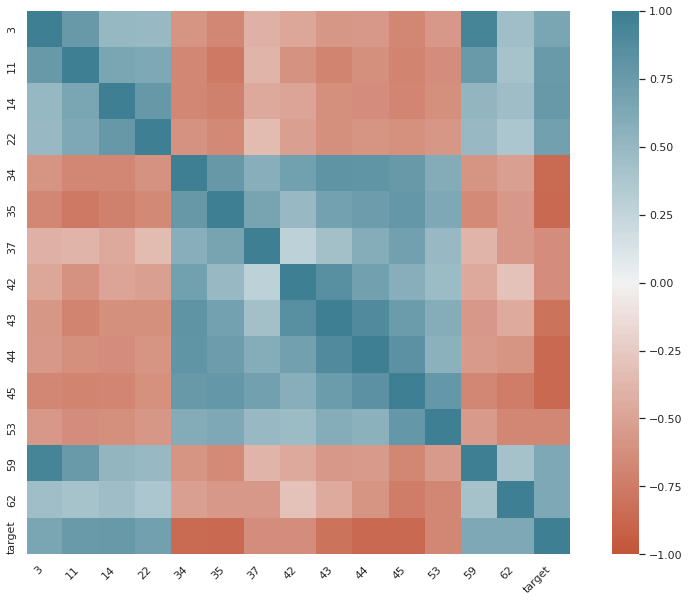

In [14]:
features = corr[corr['target'].abs() > 0.6].index  # [3, 11, 14, 22, 34, 35, 37, 42, 43, 44, 45, 53, 59, 62, 'target']

sns.set(rc={'figure.figsize':(15,10)})
ax = sns.heatmap(
    corr.loc[features,features], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
);

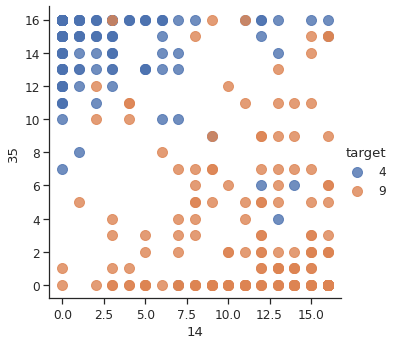

In [15]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
df.columns = df.columns.astype(str)
g = sns.lmplot(x='14', # Horizontal axis
           y='35', # Vertical axis
           data=df, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="target", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}); # S marker size

In [16]:
# import plotly.express as px

# df['target'] = df['target'].astype(str)
# px.scatter(df, x='14', y='35', color='target')

## División en Traning y Test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

In [18]:
X_train.shape

(252, 64)

## Partial Fit

In [19]:
clf = Perceptron(max_iter=10, tol=0.0001, eta0=0.1, random_state=0)

In [20]:
clf.partial_fit(X_train, y_train, classes=class_list)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=10, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.0001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
clf.score(X_train, y_train)

0.9880952380952381

In [22]:
clf.score(X_test, y_test)

0.981651376146789

In [23]:
y_pred = clf.predict(X_test)
# View the accuracy of the model, which is: 1 - (observations predicted wrong / total observations)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2%}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.2%}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.2%}')

Accuracy: 98.17%
Precision: 98.23%
Recall: 98.17%


In [24]:
clf.partial_fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=10, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.0001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
clf.score(X_train, y_train)

0.9880952380952381

In [26]:
clf.score(X_test, y_test)

0.963302752293578

In [27]:
y_pred = clf.predict(X_test)
# View the accuracy of the model, which is: 1 - (observations predicted wrong / total observations)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2%}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.2%}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.2%}')

Accuracy: 96.33%
Precision: 96.58%
Recall: 96.33%


In [28]:
clf.partial_fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=10, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.0001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
clf.score(X_train, y_train)

1.0

In [30]:
clf.score(X_test, y_test)

1.0

In [31]:
y_pred = clf.predict(X_test)
# View the accuracy of the model, which is: 1 - (observations predicted wrong / total observations)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2%}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.2%}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.2%}')

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%


## Fit

In [32]:
clf = Perceptron(max_iter=10, tol=0.001, eta0=0.1, random_state=0)
clf.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=10, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
clf.score(X_train, y_train)

1.0

In [34]:
y_pred = clf.predict(X_test)
# View the accuracy of the model, which is: 1 - (observations predicted wrong / total observations)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2%}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.2%}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.2%}')

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%


In [35]:
clf.n_iter_

9

## Perceptrón y la Frontera de Decisión

Probemos lo mismo pero usando solo dos pixeles. Por ejemplo, 14 y 35.

In [36]:
X = df[['14','35']].values
y = df[['target']].values.ravel()

In [37]:
X.shape, y.shape

((361, 2), (361,))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

In [39]:
clf = Perceptron(max_iter=5, tol=0.0001, eta0=0.1, random_state=0)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=5, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.0001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Como solo tenemos dos *features*, es posible obtener gráficamente la frontera de decisión que surge de entrenar el modelo.

Accuracy: 92.66%
Precision: 92.66%
Recall: 92.66%


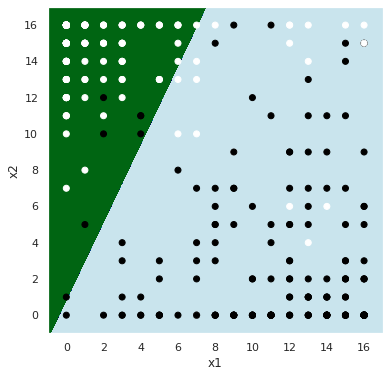

In [40]:
sns.set(rc={'figure.figsize':(6,6)})
plot_decision_boundary(lambda x: clf.predict(x), X.T, y.T)
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2%}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.2%}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.2%}')

Qué pasará cuando cambiamos el el random_state?

In [41]:
clf = Perceptron(max_iter=5, tol=0.0001, eta0=0.1, random_state=2021)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=5, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=2021, shuffle=True, tol=0.0001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Accuracy: 88.99%
Precision: 90.96%
Recall: 88.99%


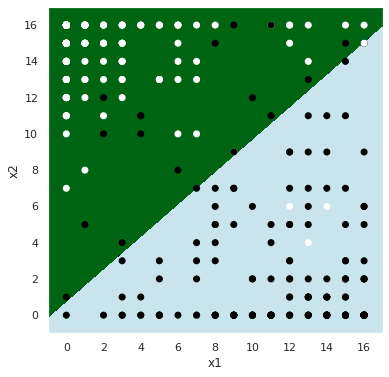

In [42]:
sns.set(rc={'figure.figsize':(6,6)})
plot_decision_boundary(lambda x: clf.predict(x), X.T, y.T)
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2%}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.2%}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.2%}')

### Partial Fit

Y qué pasa si hacemos fit parcial?

In [43]:
clf = Perceptron(max_iter=5, tol=0.0001, eta0=0.1, random_state=0)

#### Iteración 1

In [44]:
clf.partial_fit(X_train, y_train, classes=class_list)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=5, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.0001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Accuracy: 89.91%
Precision: 90.57%
Recall: 89.91%


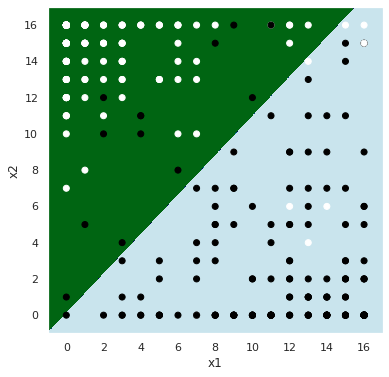

In [45]:
sns.set(rc={'figure.figsize':(6,6)})
plot_decision_boundary(lambda x: clf.predict(x), X.T, y.T)
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2%}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.2%}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.2%}')

#### Iteración 2

In [46]:
clf.partial_fit(X_train, y_train, classes=class_list)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=5, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.0001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Accuracy: 90.83%
Precision: 90.88%
Recall: 90.83%


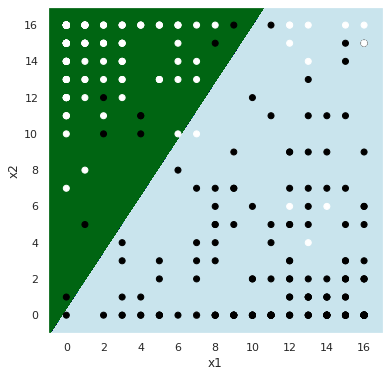

In [47]:
sns.set(rc={'figure.figsize':(6,6)})
plot_decision_boundary(lambda x: clf.predict(x), X.T, y.T)
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2%}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.2%}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.2%}')

#### Iteración 3

In [48]:
clf.partial_fit(X_train, y_train, classes=class_list)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=5, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.0001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Accuracy: 90.83%
Precision: 90.88%
Recall: 90.83%


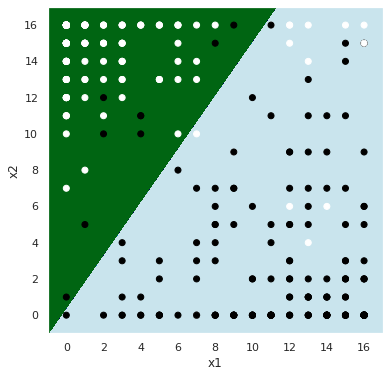

In [49]:
sns.set(rc={'figure.figsize':(6,6)})
plot_decision_boundary(lambda x: clf.predict(x), X.T, y.T)
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2%}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.2%}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.2%}')

#### Iteración 4

In [50]:
clf.partial_fit(X_train, y_train, classes=class_list)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=5, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.0001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Accuracy: 88.07%
Precision: 90.35%
Recall: 88.07%


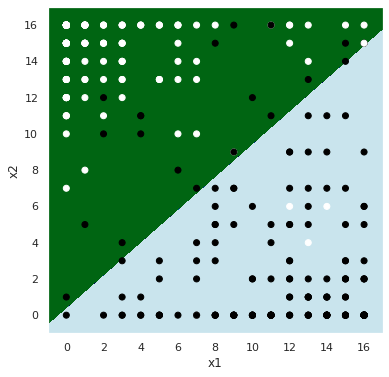

In [51]:
sns.set(rc={'figure.figsize':(6,6)})
plot_decision_boundary(lambda x: clf.predict(x), X.T, y.T)
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2%}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.2%}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.2%}')

#### Iteración 5

In [52]:
clf.partial_fit(X_train, y_train, classes=class_list)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=5, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.0001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Accuracy: 90.83%
Precision: 90.88%
Recall: 90.83%


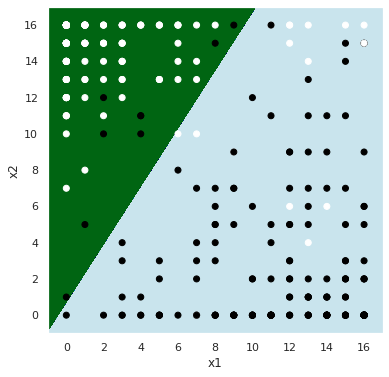

In [53]:
sns.set(rc={'figure.figsize':(6,6)})
plot_decision_boundary(lambda x: clf.predict(x), X.T, y.T)
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2%}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.2%}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.2%}')

Intentemos rescatar las *accuracy* de cada iteración, para entender el comportamiento.

In [73]:
n_iter = 10
clf = Perceptron(max_iter=n_iter, tol=0.0001, eta0=0.1, random_state=5)

acc = [] 
for i in range(n_iter):
    clf.partial_fit(X_train, y_train, classes=np.unique(y_train))
    y_pred = clf.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))

[(0.7, 1.0)]

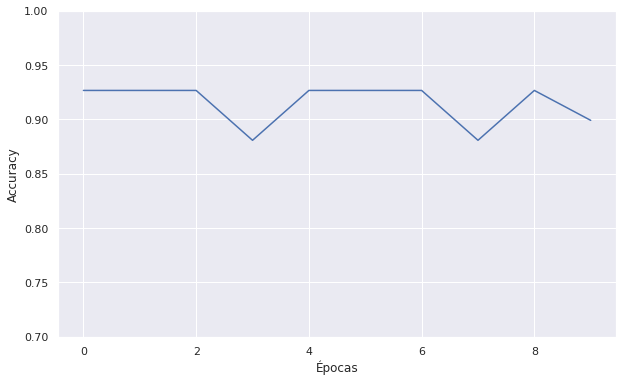

In [76]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_ylabel('Accuracy')
ax.set_xlabel('Épocas')
sns.lineplot(data=acc, ax=ax).set(ylim=(0.7, 1))

In [56]:
acc[-3:]

[0.8715596330275229, 0.908256880733945, 0.908256880733945]

## Otros Experimentos Posibles

Otros experimentos que podemos realizar utilizando esta misma notebook, son los que responden a las siguientes preguntas:

1. ¿Qué ocurre con este modelo cuando utilizamos dos dígitos que son intuitivamente más diferenciables?
2. ¿Cómo responde el modelo cuando utilizamos otros píxeles (*features*) menos correlacionados con el target (etiqueta del dígito)?
3. ¿Cómo responde el modelo cuando utilizamos otros píxeles que estén correlacionados en el mismo sentido con el target?

# Problemas que un Perceptrón Simple no Puede Resolver

Por qué este problema no puede ser resuelto por un Perceptrón simple?

![image](https://drive.google.com/uc?export=view&id=108NueZsFuX8WdeKhMiUx_RRQyEO6J3mS)

**Spoiler alert!** Ahí es donde entrarán los Perceptrones Multicapa (que no son más que varios Perceptrones "apilados"), que serán capaces de resolver problemas no lineales.